In [1]:
import shap
import joblib
import numpy as np
import matplotlib.pyplot as plt

c:\Users\vaish\Desktop\kachra\tnp-portal\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = joblib.load("xgboost_placement_model.pkl")
X = joblib.load("X_features.pkl")
feature_names = joblib.load("feature_names.pkl")

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)


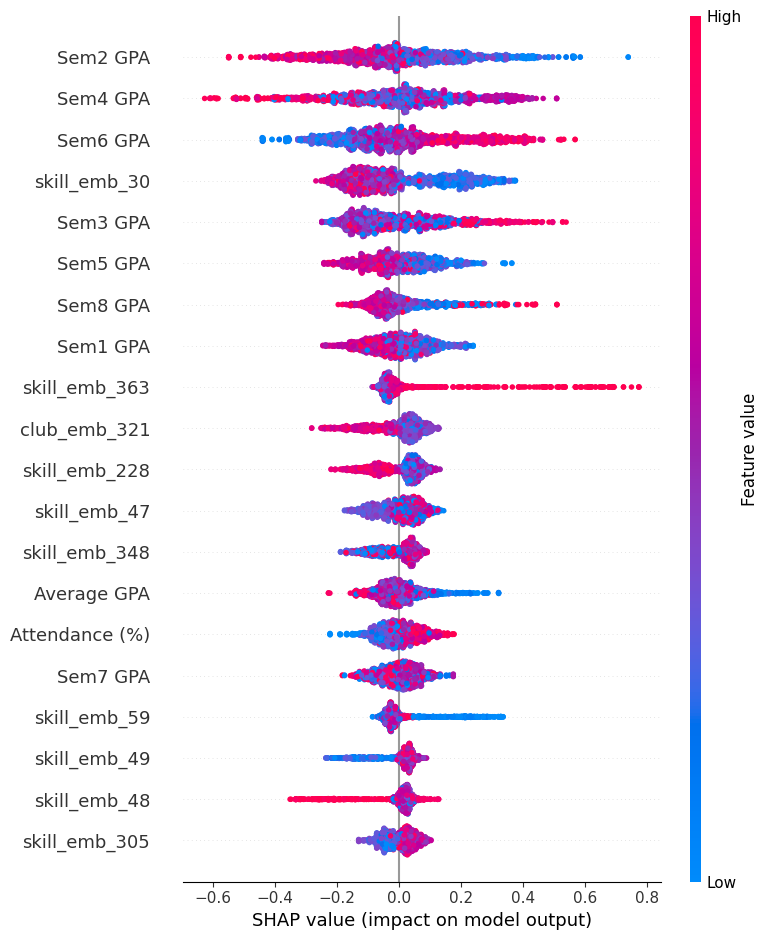

In [3]:
shap.summary_plot(
    shap_values,
    X,
    feature_names=feature_names,
    show=False
)


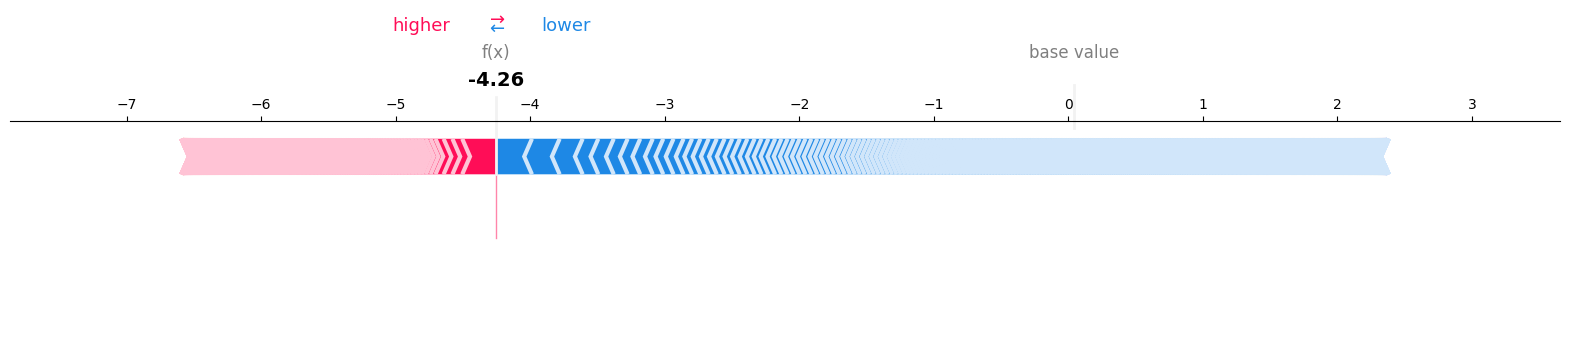

In [4]:
student_idx = 0  # example student

shap.force_plot(
    explainer.expected_value,
    shap_values[student_idx],
    X[student_idx],
    feature_names=feature_names,
    matplotlib=True
)


In [5]:
joblib.dump(explainer, "shap_explainer.pkl")
joblib.dump(shap_values, "shap_values.pkl")

['shap_values.pkl']

In [1]:
import joblib
import numpy as np

explainer = joblib.load("shap_explainer.pkl")
shap_values = joblib.load("shap_values.pkl")
X = joblib.load("X_features.pkl")
feature_names = joblib.load("feature_names.pkl")

print("SHAP shape:", shap_values.shape)
print("Total features:", len(feature_names))


c:\Users\vaish\Desktop\kachra\tnp-portal\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SHAP shape: (1999, 1171)
Total features: 1171


In [2]:
from collections import defaultdict

feature_groups = defaultdict(list)

for idx, name in enumerate(feature_names):
    if name.startswith("skill_emb"):
        feature_groups["Skills"].append(idx)
    elif name.startswith("internship_domain_emb"):
        feature_groups["Internship Domain"].append(idx)
    elif name.startswith("club_emb"):
        feature_groups["Clubs"].append(idx)
    elif name.startswith("Branch_"):
        feature_groups["Branch"].append(idx)
    else:
        feature_groups["Academics"].append(idx)

for k, v in feature_groups.items():
    print(k, "→", len(v), "features")


Academics → 13 features
Branch → 6 features
Skills → 384 features
Clubs → 384 features
Internship Domain → 384 features


In [3]:
def aggregate_shap_for_student(student_idx):
    student_shap = shap_values[student_idx]

    aggregated = {}
    for group, indices in feature_groups.items():
        aggregated[group] = float(np.sum(student_shap[indices]))

    return aggregated

In [11]:
student_idx = 9  # change to test others
agg = aggregate_shap_for_student(student_idx)

for k, v in agg.items():
    print(f"{k}: {v:.4f}")

Academics: -0.7969
Branch: -0.0073
Skills: -1.7248
Clubs: -0.7125
Internship Domain: -0.2626


In [10]:
sorted_impacts = sorted(
    agg.items(),
    key=lambda x: abs(x[1]),
    reverse=True
)

sorted_impacts


[('Skills', 2.517317295074463),
 ('Clubs', 1.7768287658691406),
 ('Academics', 1.1217024326324463),
 ('Internship Domain', -0.3232211172580719),
 ('Branch', 0.030782653018832207)]